In [179]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
#BTC Dataset from CoinmarketCap
btc = pd.read_csv("btc_data.csv")

In [137]:
#Dropping the first 2 rows... cleaning data
btc.drop([0,1], axis = 0, inplace=True)

In [139]:
btc

,Price,Close,High,Low,Open,Volume
2,2023-01-01,16625.080078125,16630.439453125,16521.234375,16547.9140625,9244361700
3,2023-01-02,16688.470703125,16759.34375,16572.228515625,16625.509765625,12097775227
4,2023-01-03,16679.857421875,16760.447265625,16622.37109375,16688.84765625,13903079207
5,2023-01-04,16863.23828125,16964.5859375,16667.763671875,16680.205078125,18421743322
6,2023-01-05,16836.736328125,16884.021484375,16790.283203125,16863.47265625,13692758566
...,...,...,...,...,...,...
1000,2025-09-25,109049.2890625,113541.0859375,108713.3984375,113330.1640625,75528654284
1001,2025-09-26,109712.828125,110359.1953125,108728.9765625,109041.296875,57738288949
1002,2025-09-27,109681.9453125,109778.5,109144.296875,109707.140625,26308042910
1003,2025-09-28,112122.640625,112375.484375,109236.9453125,109681.9453125,33371048505


In [141]:
#Renaming the Price column 
btc = btc.rename(columns={"Price": "Date"})

In [143]:
btc

,Date,Close,High,Low,Open,Volume
2,2023-01-01,16625.080078125,16630.439453125,16521.234375,16547.9140625,9244361700
3,2023-01-02,16688.470703125,16759.34375,16572.228515625,16625.509765625,12097775227
4,2023-01-03,16679.857421875,16760.447265625,16622.37109375,16688.84765625,13903079207
5,2023-01-04,16863.23828125,16964.5859375,16667.763671875,16680.205078125,18421743322
6,2023-01-05,16836.736328125,16884.021484375,16790.283203125,16863.47265625,13692758566
...,...,...,...,...,...,...
1000,2025-09-25,109049.2890625,113541.0859375,108713.3984375,113330.1640625,75528654284
1001,2025-09-26,109712.828125,110359.1953125,108728.9765625,109041.296875,57738288949
1002,2025-09-27,109681.9453125,109778.5,109144.296875,109707.140625,26308042910
1003,2025-09-28,112122.640625,112375.484375,109236.9453125,109681.9453125,33371048505


In [155]:
#Changing the date from string to actual date and setting the date as index
btc["Date"] = pd.to_datetime(btc["Date"], errors="coerce")
btc.set_index("Date", inplace= True)

In [159]:
#Setting the needed columns to numeric values toenable calculations
for col in ["Close", "High", "Low", "Open", "Volume"]:
    btc[col] = pd.to_numeric(btc[col], errors="coerce")

In [171]:
#Selecting the close column
btc= btc[["Close"]]

In [173]:
#Calculating the returns
btc["Returns"] = btc["Close"].pct_change()

In [175]:
#Calculating the Moving Averages
btc["MA20"] = btc["Close"].rolling(window=20).mean()
btc["MA50"] = btc["Close"].rolling(window=50).mean()
btc["MA100"] = btc["Close"].rolling(window=20).mean()
btc["MA200"] = btc["Close"].rolling(window=50).mean()
btc["MA300"] = btc["Close"].rolling(window=20).mean()
btc["MA365"] = btc["Close"].rolling(window=50).mean()

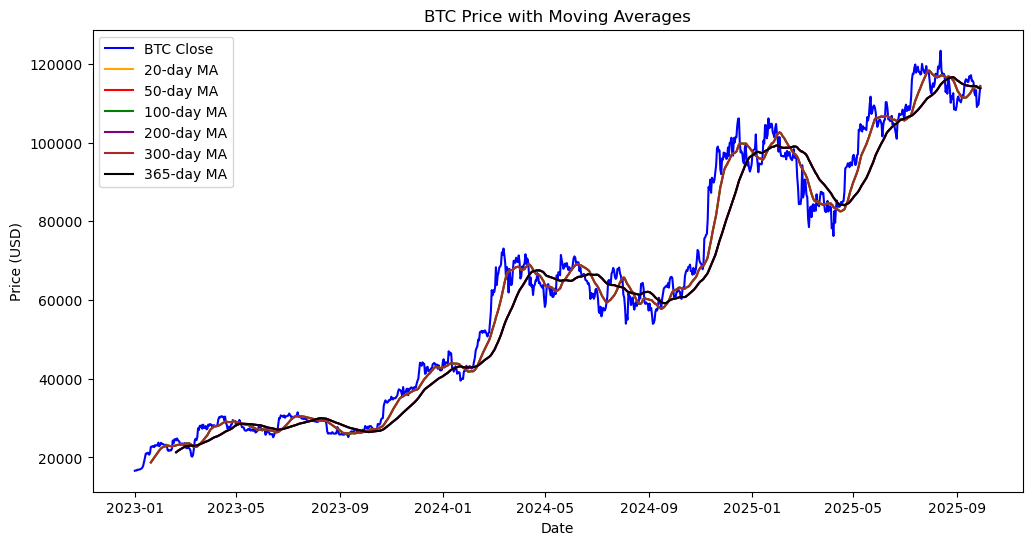

In [183]:
#Plots
plt.figure(figsize=(12,6))
plt.plot(btc.index, btc["Close"], label="BTC Close", color= "blue")
plt.plot(btc.index, btc["MA20"], label="20-day MA", color= "orange")
plt.plot(btc.index, btc["MA50"], label="50-day MA", color= "red")
plt.plot(btc.index, btc["MA100"], label="100-day MA", color= "green")
plt.plot(btc.index, btc["MA200"], label="200-day MA", color= "purple")
plt.plot(btc.index, btc["MA300"], label="300-day MA", color= "brown")
plt.plot(btc.index, btc["MA365"], label="365-day MA", color= "black")
plt.title("BTC Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

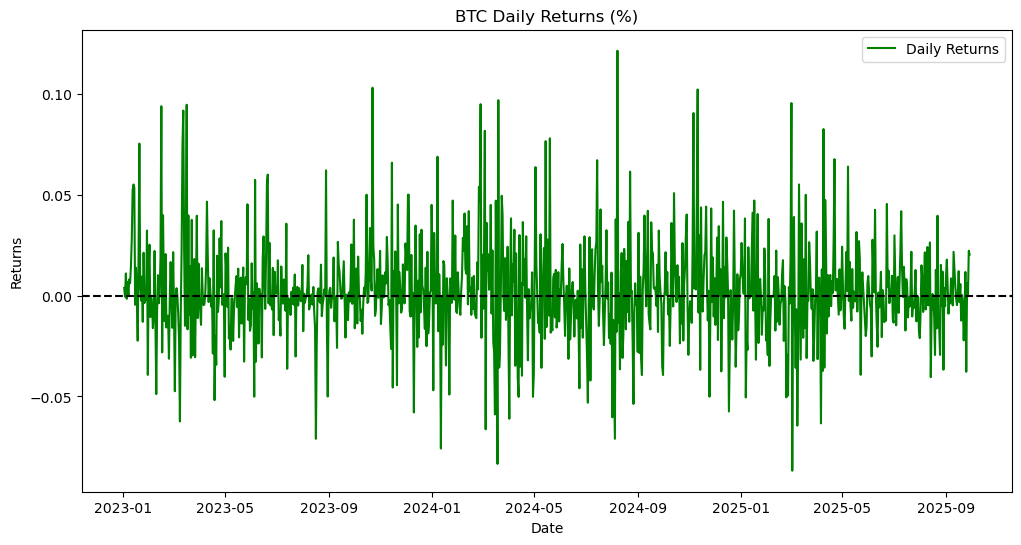

In [185]:
plt.figure(figsize=(12,6))
plt.plot(btc.index, btc["Returns"], label="Daily Returns", color="green")
plt.axhline(0, linestyle="--", color="black")
plt.title("BTC Daily Returns (%)")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

>## BTC Price & Trading Insight Analysis
* Cleaned and structured raw BTC-USD historical price data for time-series analysis.
* Engineered features including daily returns and moving averages (20, 50, 100, 200, 300 & 365 days) to evaluate short-term vs long-term market trends.
* Visualized BTC performance with trend lines and volatility plots to highlight market momentum and risk.
* Key findings: BTC shows strong upward trends punctuated by periods of sharp volatility; short-term MA crossovers provide potential trading signals, while daily returns confirm BTC’s high-risk, high-reward profile.